In [1]:
import sys
### general purpose
import os
import numpy as np
import numpy.ma as ma
import xarray as xr
import pandas as pd
### palette
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker
#import matplotlib.cm as cm
#div_cmap = mplcm.seismic
import cmocean
from cmocean import cm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.io as sio
from pylab import *
from netCDF4 import Dataset


#sys.path.insert(0,'/home/barboty/Téléchargements/mes notebooks')

#import Fonctions_detection as fd

%matplotlib inline

/home/barboty/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [58]:
# Chargement des donnees
## Chemins utiles pour la suite

CompletePath = local + chemin + CURL
CompletePathV = local + chemin + VITA
LatLon = local + chemin + CURL
Melange = cal1 + annee + chemin + SSH
Temperature = cal1+annee+chemin+Temp
ToMask = datas + mask

f = Dataset(LatLon, "r", format="NETCDF4")
nav_lat = f.variables['nav_lat']
nav_lon = f.variables['nav_lon']

Mas = Dataset(ToMask, "r", format = "NETCDF4")
ValeurMask = Mas.variables['tmask'][0]

g = Dataset(Temperature, "r", format="NETCDF4")
Tx = g.variables['votemper'][0,:,centreY,:]
Ty = g.variables['votemper'][0,:,:,centreX]
Sx = g.variables['vosaline'][0,:,centreY,:]
Sy = g.variables['vosaline'][0,:,:,centreX]

h = Dataset(Melange, "r", format = "NETCDF4")
MXL = h.variables['somxl010'][0]

k = Dataset(CompletePath, "r", format = "NETCDF4")
VV = k.variables['socurloverf'][0,:,centreY,:]
UU = k.variables['socurloverf'][0,:,:,centreX]
vv = k.variables['socurloverf'][0,0,:,:]

l = Dataset(CompletePathV, "r", format = "NETCDF4")
VITUX = l.variables['sovitua'][0,:,centreY,:]
VITUY = l.variables['sovitua'][0,:,:, centreX]

VITVX = l.variables['sovitva'][0,:,centreY,:]
VITVY = l.variables['sovitva'][0,:,:,centreX]

In [11]:
f = xr.open_dataset('/home/barboty/Work/Documentation_Tourbillon2007/Mars2007/NATL60LAB-MJM155_y2007m03d04.1d_CURLOVERF.nc')
nav_lat = f.nav_lat
nav_lon = f.nav_lon
curl= f.socurloverf[0,0]


In [12]:
curl.shape

(748, 942)

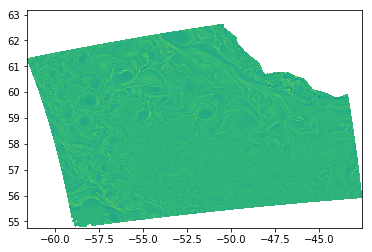

In [13]:
plt.pcolormesh(nav_lon,nav_lat,curl)

In [57]:
# Creation des tableaux de longitude/latitude

lon=f.variables['nav_lon'][centreY,:] # Longitude
lat=f.variables['nav_lat'][:,centreX] # Latitude

INTX = f.variables['nav_lon'][centreY,centreX-50:centreX+50]
if centreX-50 <0:
    INTX = f.variables['nav_lon'][centreY,0:centreX+50]
elif centreX+50 > 942:
    INTX = f.variables['nav_lon'][centreY,centreX-50:942]
else:
    INTX = f.variables['nav_lon'][centreY,centreX-50:centreX+50]
if centreY-50<0:
    INTY = f.variables['nav_lat'][0:centreY+50,centreX]
elif centreY+50 > 748:
    INTY = f.variables['nav_lat'][centreY-50:748,centreX]
else:
    INTY = f.variables['nav_lat'][centreY-50:centreY+50,centreX]



/home/barboty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  This is separate from the ipykernel package so we can avoid doing imports until
/home/barboty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  after removing the cwd from sys.path.
/home/barboty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  
/home/barboty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  if sys.path[0] == '':
/home/barboty/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely c

In [60]:
def TraceVitesse(X,D,V,posCentre,intervalle, DATE, indice):
    
    ### Permet de tracer la vitesse sur un intervalle X, sur tous les niveaux de profondeurs, pour la vitesse étudiée ###
    
    VIT = np.array(V)
    
    plt.gca().invert_yaxis()
    ax = plt.subplot(111)
    ax.set_ylim(3900,0)
    ax.set_ylabel('Depth (m)',fontsize=12)
    ax.set_xlabel('Ecart au centre du tourbillon',fontsize=12)
    if (indice == 'VITUX'):
        plt.title('Coupe longitudinale de la vitesse selon i', fontsize = 20)
        v = 'i'
        vmin = -0.2
        vmax = 0.2
    elif (indice == 'VITUY'):
        plt.title('Coupe transversale de la vitesse selon i', fontsize = 20)
        v = 'i'
        vmin = -0.9
        vmax = 0.9
    elif (indice == 'VITVX'):
        plt.title('Coupe longitudinale de la vitesse selon j', fontsize = 20)
        v = 'j'
        vmin = -0.5
        vmax = 0.5
    elif (indice == 'VITVY'):
        plt.title('Coupe transversale de la vitesse selon j', fontsize = 20)
        v = 'j'
        vmin = -0.2
        vmax = 0.2
    if posCentre-intervalle<0:
        pcolor(X, Depth, VIT[:,0:posCentre+intervalle],cmap='seismic', vmin = vmin, vmax = vmax)
    else:
        pcolor(X, Depth, VIT[:,posCentre-intervalle:posCentre+intervalle],cmap='seismic', vmin = vmin, vmax = vmax) 

    plt.colorbar()

    plt.savefig(DATE + indice,bbox_inches='tight')


In [67]:
def TraceSalinite(X,D,S,posCentre,intervalle, DATE, indice):
    
    ### Permet de tracer la vitesse sur un intervalle X, sur tous les niveaux de profondeurs, pour la vitesse étudiée ###
    
    SAL = np.array(S)
    
    plt.gca().invert_yaxis()
    ax = plt.subplot(111)
    ax.set_ylim(3900,0)
    ax.set_ylabel('Depth (m)',fontsize=12)
    ax.set_xlabel('Ecart au centre du tourbillon',fontsize=12)

    pcolor(X, Depth, SAL[:,posCentre-intervalle:posCentre+intervalle],cmap='Spectral') #vmin = vmin, vmax = vmax) 

    plt.colorbar()

    plt.savefig(DATE + indice,bbox_inches='tight')


In [74]:
ValeurMask

masked_array(
  data=[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-127,
  dtype=int8)

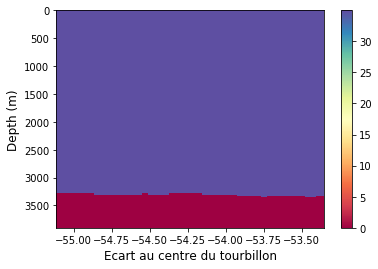

In [71]:
ValeurMask = Mas.variables['tmask'][0, :, centreY, :]

NSAL = ma.masked_where(ValeurMask == 0, Sx)


TraceSalinite(INTX, Depth, NSAL, centreX, 50, date, 'SaliniteX')


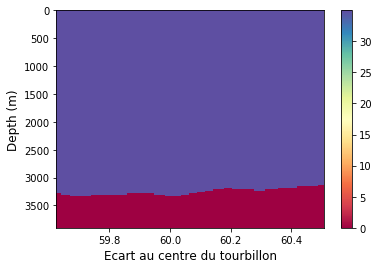

In [69]:
TraceSalinite(INTY, Depth, Sy, centreY, 50, date, 'SaliniteY')

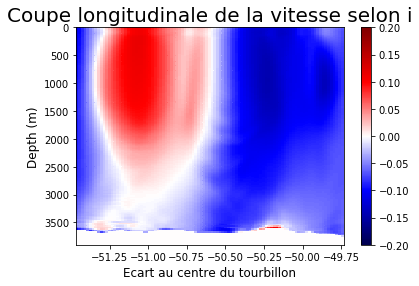

In [228]:
# Trace des vitesses

#ValeurMask = Mas.variables['tmask'][0, :, centreY, :]

#NVIT = ma.masked_where(ValeurMask == 0, VITUX)

Qvit = 'VITUX'

TraceVitesse(INTX, Depth, VITUX, centreX, 50, date, Qvit)


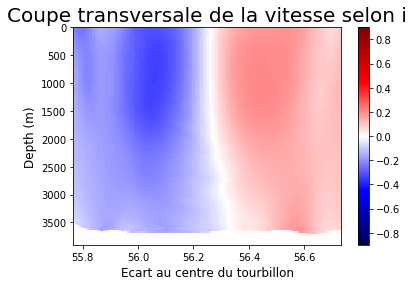

In [229]:
Qvit = 'VITUY'

TraceVitesse(INTY, Depth, VITUY, centreY, 50, date, Qvit)


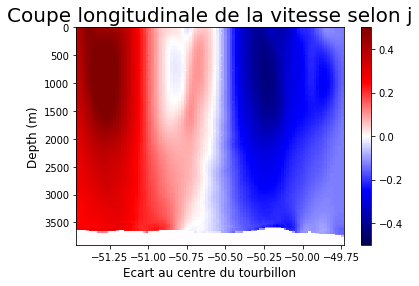

In [230]:
Qvit = 'VITVX'

TraceVitesse(INTX, Depth, VITVX, centreX, 50, date, Qvit)

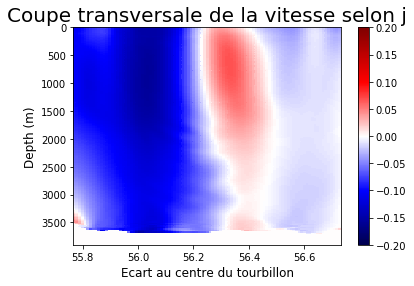

In [231]:
Qvit = 'VITVY'

TraceVitesse(INTY, Depth, VITVY, centreY, 50, date, Qvit)

In [52]:
# Creation des tableaux de couche de melange

MXL_Y = MXL[:,centreX]
MXL_X = MXL[centreY,:]

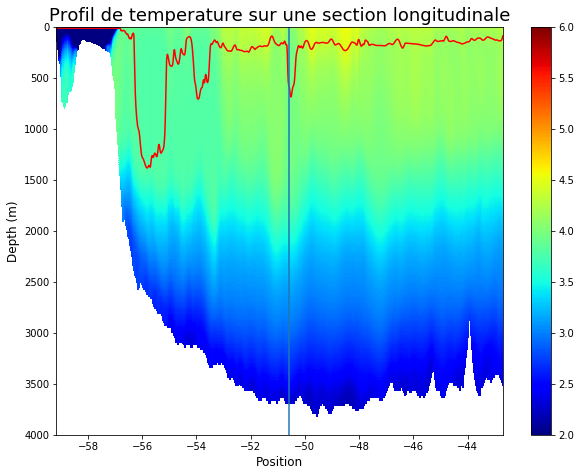

In [233]:
# Trace du profil de temperature sur une coupe longitudinale

plt.figure(figsize=(10,7.5))
plt.gca().invert_yaxis()
ax = plt.subplot(111)
ax.set_ylim(4000,0)
#ax.set_xlim(-60.7,-46.5)
ax.set_ylabel('Depth (m)',fontsize=12)
ax.set_xlabel('Position',fontsize=12)
plt.title('Profil de temperature sur une section longitudinale', fontsize = 18)

pcolor(lon, Depth, Tx,cmap='jet', vmin=2, vmax=6)
plt.colorbar()
plt.plot(lon, MXL_X, 'r')


# Plot position tourbillon

xx = np.array([lon[centreX], lon[centreX]])
yy = np.array([4000, 0])
plt.plot(xx, yy)


plt.savefig(str(jour)+'_'+ mois +'_'+ annee+'_Temperature_x',bbox_inches='tight')

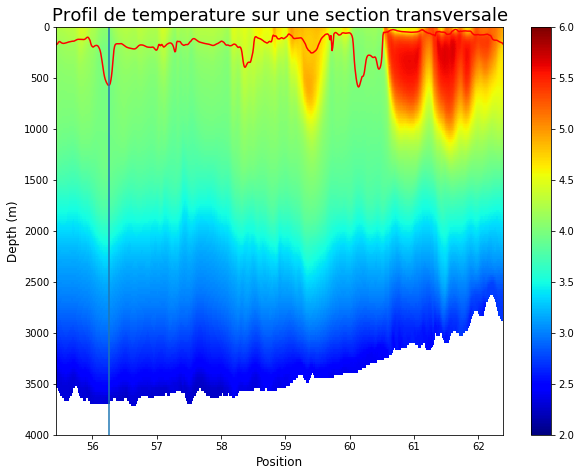

In [234]:
# Trace du profil de temperature sur une coupe transversale

plt.figure(figsize=(10,7.5))
plt.gca().invert_yaxis()
ax = plt.subplot(111)
ax.set_ylim(4000,0)
ax.set_ylabel('Depth (m)',fontsize=12)
ax.set_xlabel('Position',fontsize=12)
plt.title('Profil de temperature sur une section transversale', fontsize = 18)

pcolor(lat, Depth, Ty,cmap='jet', vmin=2, vmax=6)
plt.colorbar()
plt.plot(lat, MXL_Y, 'r')


# Plot position tourbillon

xx = np.array([lat[centreY], lat[centreY]])
yy = np.array([4000, 0])
plt.plot(xx, yy)


plt.savefig(str(jour)+'_'+ mois +'_'+ annee+'_Temperature_y',bbox_inches='tight')

(942,)

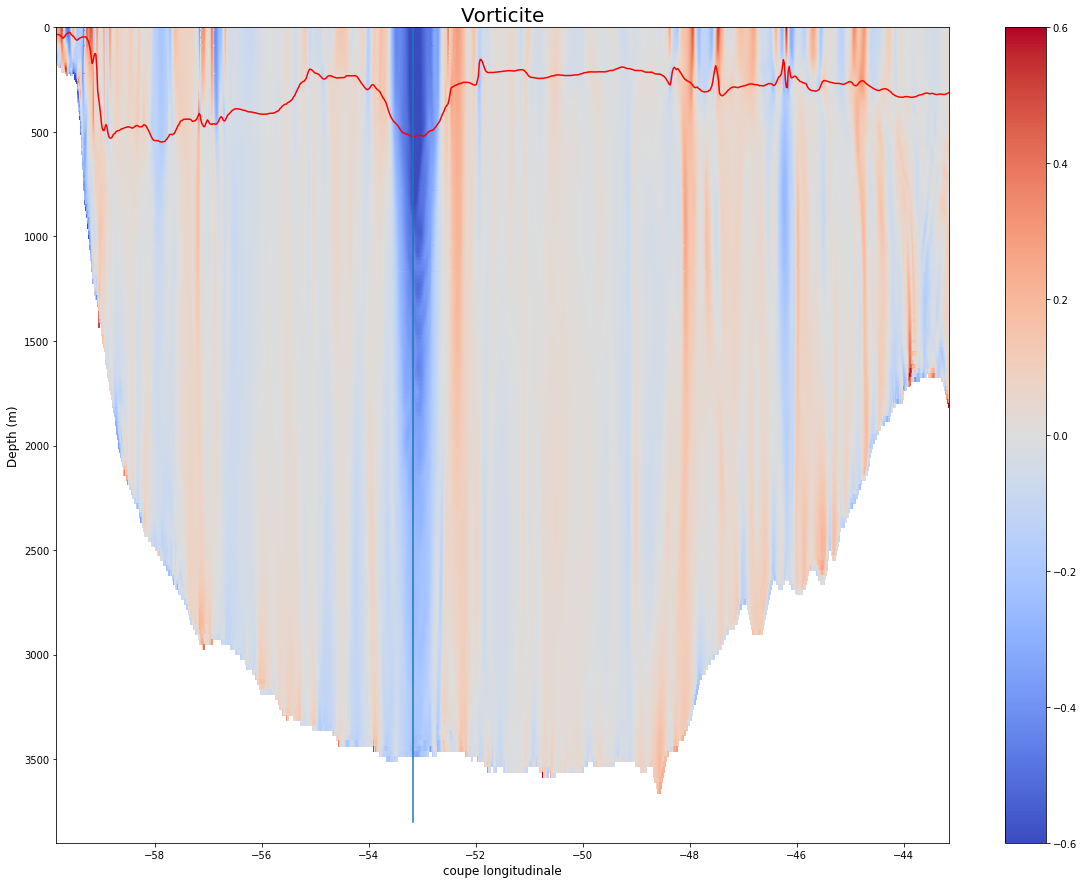

In [53]:
# Trace coupe longitudinale de la vorticite a une date donnee sur tous les niveaux
# Passant par le centre du tourbillon etudie


plt.figure(figsize=(20,15))
plt.gca().invert_yaxis()
ax = plt.subplot(111)
ax.set_ylim(3900,0)
#ax.set_xlim(-60.7,-46)
ax.set_ylabel('Depth (m)',fontsize=12)
ax.set_xlabel('coupe longitudinale',fontsize=12)

plt.title('Vorticite', fontsize = 20)
pcolor(lon, Depth, VV,cmap='coolwarm',vmin = -0.6,vmax = 0.6)
plt.colorbar()
plt.plot(lon, MXL_X, 'r')

xx = np.array([lon[centreX], lon[centreX]])
yy = np.array([3800, 0])
plt.plot(xx, yy)

plt.savefig(str(jour)+'_'+ mois +'_'+ annee+'_Vorticite_x',bbox_inches='tight')
show()

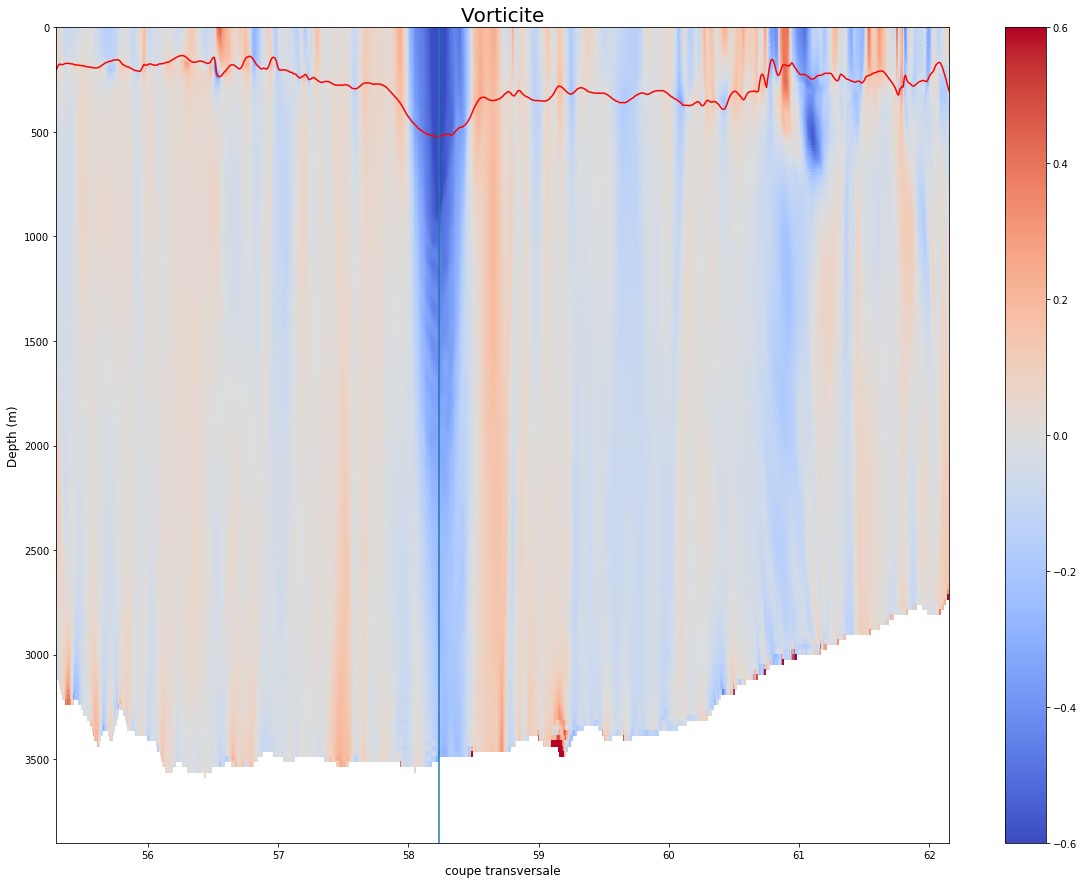

In [54]:
# Trace coupe transversale de la vorticite a une date donnee sur tous les niveaux
# Passant par le centre du tourbillon etudie



plt.figure(figsize=(20,15))
plt.gca().invert_yaxis()
ax = plt.subplot(111)
ax.set_ylim(3900,0)
ax.set_ylabel('Depth (m)',fontsize=12)
ax.set_xlabel('coupe transversale',fontsize=12)


plt.title('Vorticite', fontsize = 20)

pcolor(lat, Depth, UU,cmap='coolwarm',vmin = -0.6,vmax = 0.6)
plt.colorbar()
plt.plot(lat, MXL_Y, 'r')

xx = np.array([lat[centreY], lat[centreY]])
yy = np.array([4000, 0])
plt.plot(xx, yy)

plt.savefig(str(jour)+'_'+ mois +'_'+ annee+'_Vorticite_y',bbox_inches='tight')


show()

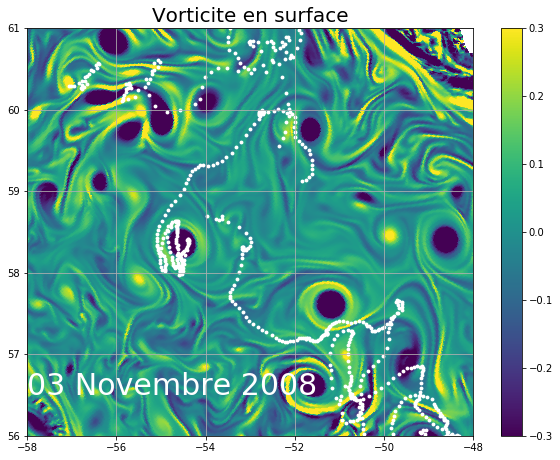

In [200]:
# Affichage de la carte de vorticite en surface, projetee et trace de la vie du tourbillon suivi

plt.figure(figsize=(10,7.5))

ax = plt.subplot(111)
plt.title('Vorticite en surface', fontsize = 20)
plt.pcolormesh(nav_lon,nav_lat,vv, vmin = -0.3, vmax=0.3)
plt.colorbar()
plt.xlim(-58,-48)
plt.ylim(56,61)
plt.grid(axis='both')
for i in range (20):  
    plt.scatter(A[i][0],A[i][1],linewidth='0', s=15, color='w') #Janv
for i in range (len(B)):
    plt.scatter(B[i][0],B[i][1],linewidth='0', s=15, color='w') #Fevr
for i in range (len(B)):    
    plt.scatter(C[i][0],C[i][1],linewidth='0', s=15, color='w') #Mars
for i in range (len(D)):
    plt.scatter(D[i][0],D[i][1],linewidth='0', s=15, color='w') #Avril
for i in range (len(E)):   
    plt.scatter(E[i][0],E[i][1],linewidth='0', s=15, color='w') #Mai
for i in range (len(F)):
    plt.scatter(F[i][0],F[i][1],linewidth='0', s=15, color='w') #Juin
for i in range (len(G)):
    plt.scatter(G[i][0],G[i][1],linewidth='0', s=15, color='w') #Juill
for i in range (len(H)):
    plt.scatter(H[i][0],H[i][1],linewidth='0', s=15, color='w') #Aout
for i in range (len(I)):
    plt.scatter(I[i][0],I[i][1],linewidth='0', s=15, color='w') #Sept
for i in range (len(J)):
    plt.scatter(J[i][0],J[i][1],linewidth='0', s=15, color='w') #Oct
for i in range (len(K)):
    plt.scatter(K[i][0],K[i][1],linewidth='0', s=15, color='w') #Nov
for i in range (len(L)):
    plt.scatter(L[i][0],L[i][1],linewidth='0', s=15, color='w') #Dec
for i in range (len(M)):  
    plt.scatter(M[i][0],M[i][1],linewidth='0', s=15, color='w') #Janv
for i in range (len(N)):
    plt.scatter(N[i][0],N[i][1],linewidth='0', s=15, color='w') #Fev
for i in range (len(O)):    
    plt.scatter(O[i][0],O[i][1],linewidth='0', s=15, color='w') #Mars
for i in range (len(P)):
    plt.scatter(P[i][0],P[i][1],linewidth='0', s=15, color='w') #Avril
for i in range (len(Q)):   
    plt.scatter(Q[i][0],Q[i][1],linewidth='0', s=15, color='w') #Mai
for i in range (len(R)):
    plt.scatter(R[i][0],R[i][1],linewidth='0', s=15, color='w') #Juin
for i in range (len(S)):
    plt.scatter(S[i][0],S[i][1],linewidth='0', s=15, color='w') #Juillet
for i in range (len(T)):
    plt.scatter(T[i][0],T[i][1],linewidth='0', s=15, color='w')
for i in range (len(U)):
    plt.scatter(U[i][0],U[i][1],linewidth='0', s=15, color='w')
for i in range (len(V)):
    plt.scatter(V[i][0],V[i][1],linewidth='0', s=15, color='w')
for i in range (3):
    plt.scatter(W[i][0],W[i][1],linewidth='0', s=15, color='w')
#for i in range (len(X)):
#    plt.scatter(X[i][0],X[i][1],linewidth='0', s=15, color='w')    
    
plt.text(-58,56.5,j +' '+ Mois +' '+ annee, color = 'white', size = 30)
plt.savefig('Vorticite_en_surface_et_suivi',bbox_inches='tight')


In [ ]:
# Pour créer un film artificiel de la vorticite a tous les niveaux

### ATTENTION : le script est très long à s'achever lorsqu'il est execute ! A manier avec precaution ###
jsogdjôgjĵ
for i in range(300):
    VV = f.variables['socurloverf'][0,i,:,:]

    plt.figure(figsize=(10,7.5))
    ax = plt.subplot(111)
    #plt.xlim(-58,-48)
    #plt.ylim(56,61)
    if (i==0):
        plt.title('Vorticite en surface', fontsize = 20)
        plt.pcolormesh(nav_lon,nav_lat,VV, vmin = -0.3, vmax=0.3)
        plt.colorbar()
        plt.grid(axis='both')
        plt.savefig('Vorticite en surface', bbox_inches = 'tight')
    else:
        plt.title('Vorticite au '+str(i+1)+' niveau', fontsize = 20)
        plt.pcolormesh(nav_lon,nav_lat,VV, vmin = -0.3, vmax=0.3)
        plt.colorbar()
        plt.grid(axis='both')
        plt.savefig(str(i+1)+'eme_Niveau',bbox_inches='tight')

In [ ]:
##############################################

##### Pour avoir une idée plus grossiere #####

##############################################

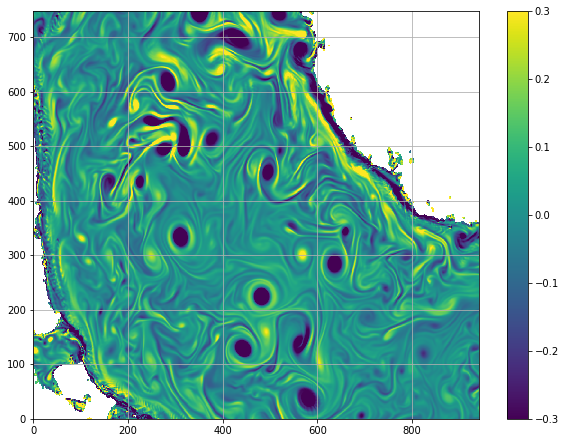

In [201]:
f = Dataset(CompletePath, "r", format = "NETCDF4")
VV = f.variables['socurloverf'][0,49,:,:]

plt.figure(figsize=(10,7.5))
plt.pcolormesh(ma.masked_invalid(np.squeeze(VV)), vmin = -0.3, vmax=0.3)
plt.colorbar()
plt.grid(axis='both')
plt.savefig('Vorticite_250m',bbox_inches='tight')

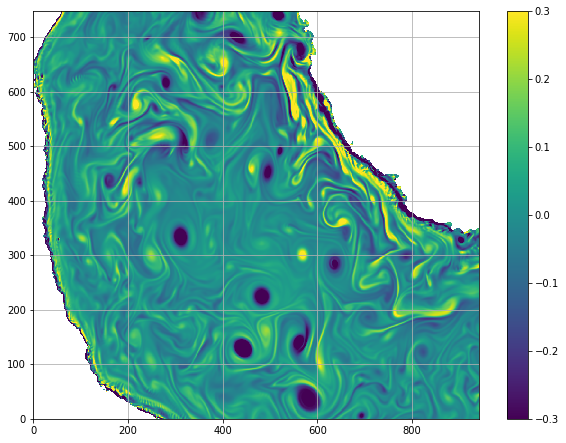

In [202]:
f = Dataset(CompletePath, "r", format = "NETCDF4")
VV = f.variables['socurloverf'][0,105,:,:]

plt.figure(figsize=(10,7.5))
plt.pcolormesh(ma.masked_invalid(np.squeeze(VV)), vmin = -0.3, vmax=0.3)
plt.colorbar()
plt.grid(axis='both')
plt.savefig('Vorticite_1000m',bbox_inches='tight')

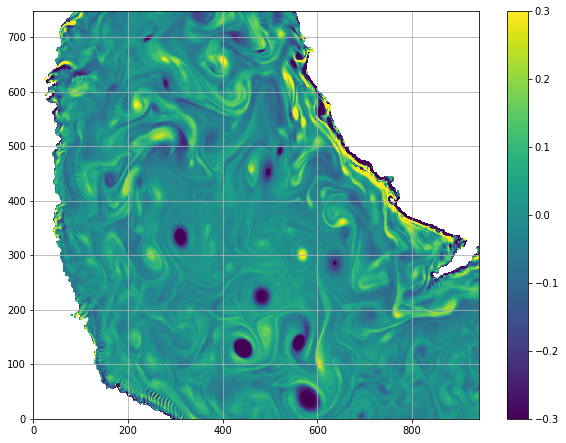

In [203]:
#Test entre les niveaux 105 et 156 (1000 et 2000m)


f = Dataset(CompletePath, "r", format = "NETCDF4")
VV = f.variables['socurloverf'][0,145,:,:]

plt.figure(figsize=(10,7.5))
plt.pcolormesh(ma.masked_invalid(np.squeeze(VV)), vmin = -0.3, vmax=0.3)
plt.colorbar()
plt.grid(axis='both')
plt.savefig('Vorticite_1750m',bbox_inches='tight')

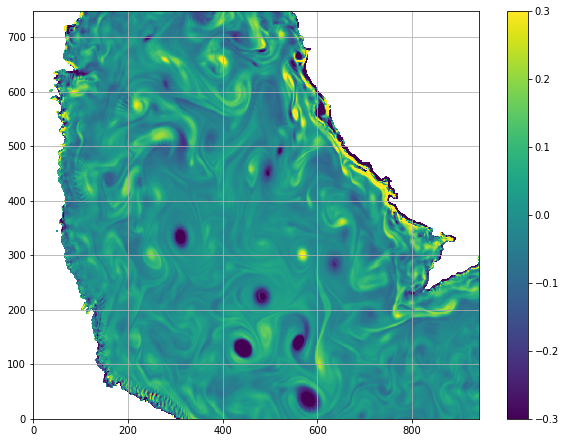

In [204]:
f = Dataset(CompletePath, "r", format = "NETCDF4")
VV = f.variables['socurloverf'][0,156,:,:]

plt.figure(figsize=(10,7.5))
plt.pcolormesh(ma.masked_invalid(np.squeeze(VV)), vmin = -0.3, vmax=0.3)
plt.colorbar()
plt.grid(axis='both')
plt.savefig('Vorticite_2000m',bbox_inches='tight')

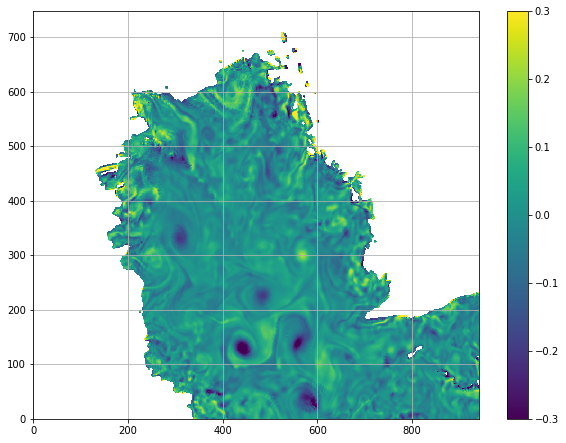

In [205]:
f = Dataset(CompletePath, "r", format = "NETCDF4")
VV = f.variables['socurloverf'][0,200,:,:]

plt.figure(figsize=(10,7.5))
plt.pcolormesh(ma.masked_invalid(np.squeeze(VV)), vmin = -0.3, vmax=0.3)
plt.colorbar()
plt.grid(axis='both')
plt.savefig('Vorticite_3000m',bbox_inches='tight')